# Zillow Appraisal Predictions

# Goals:
* identify features that contribute to single family property tax value
* use machine learning regression models to predict single family property tax values

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import acquire

# Acquire

* Accquired data from noether sequal server
* data obtained 1/15/2023
* 2,858,627 rows by 59 columns before cleaning
* Each row represents a property
* Each column represents a characteristic of a property


# Prepare
* Removed columns all columns except square feet, tax_value, bedrooms, and bathrooms
* Checked for nulls in the data and removed them
* Checked for outliers and removed them
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'tax_value'
* Scaled continuous variables


# Data Dictionary




| Feature | Definition |
|:--------|:-----------|
|tax_value(target)| this is the properties appraisal value|
|bedrooms| this is the number of bedrooms on the property|
|bathrooms| this is the number of bathrooms on the property|
|sqft| This number represents the total area of a property in square feet.|
|lm_rmse| root mean squared deviation for the classic Linear Regression model|
|lassopoly| root mean squared deviation for the classic LASSO model|
|poly_rmse| root mean squared deviation for the classic Polynomial Regression model|
|baseline| root mean squared deviation using baseline|



## A Brief look at data

In [2]:
train, val, test = acquire.wrangle_zillow()
train



,sqft,bedrooms,bathrooms,tax_value
3030,1225.0,3.0,1.0,1014822.0
47117,2462.0,4.0,3.0,524894.0
7981,982.0,3.0,2.0,413692.0
2392,1748.0,2.0,2.0,272033.0
2925,1851.0,4.0,3.0,554009.0
...,...,...,...,...
34526,1810.0,3.0,2.0,338167.0
5859,1080.0,3.0,1.0,340520.0
3928,2096.0,4.0,2.5,797361.0
44866,913.0,2.0,1.0,283501.0


# Explore

* What is a property's appraisal value?
* What variables correlate with each other?
* Can the number of bedrooms a property have help us know a property's appraisal value?
* Can the number of bathrooms a property have help us know a property's appraisal value?
* Does the area of a property help us predict tax_value?

## What is a properties appraisal value?

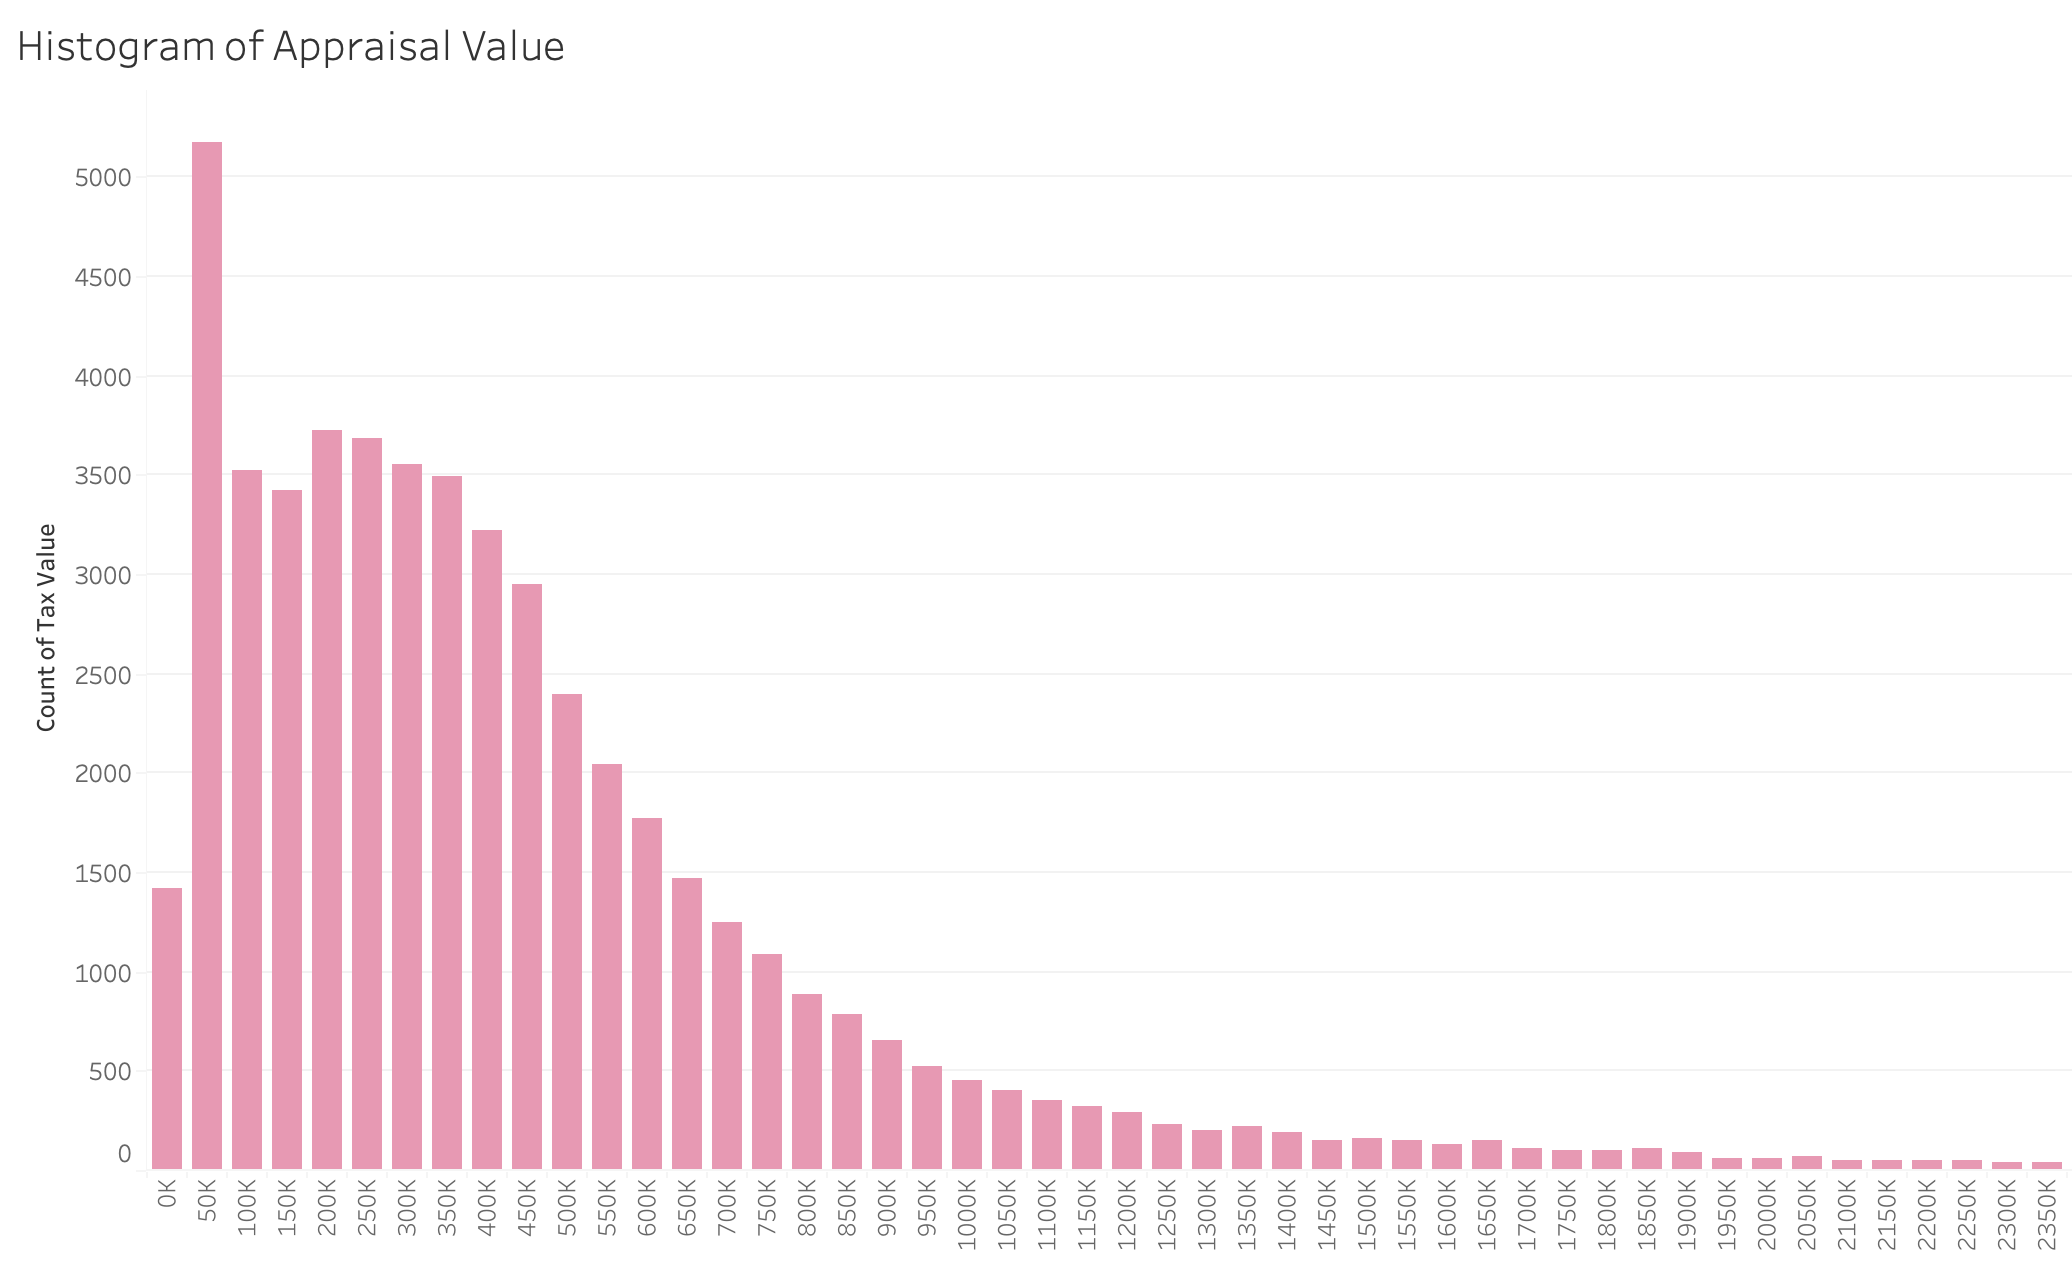

Distribution of Tax Value is skewed right with a median around 250,000

## What variables correlate with each other?

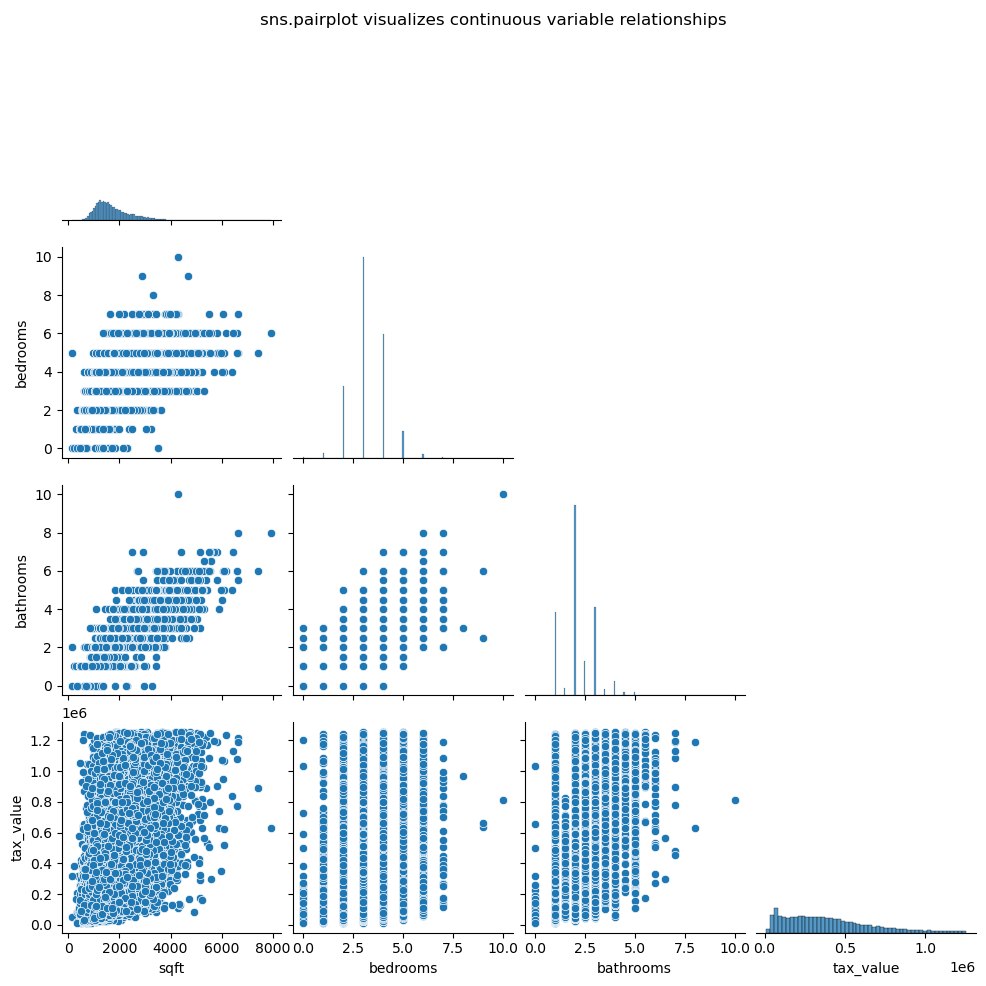

In [3]:
sns.pairplot(train, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

## Can the number of bedrooms a property have help us know a property's appraisal value?

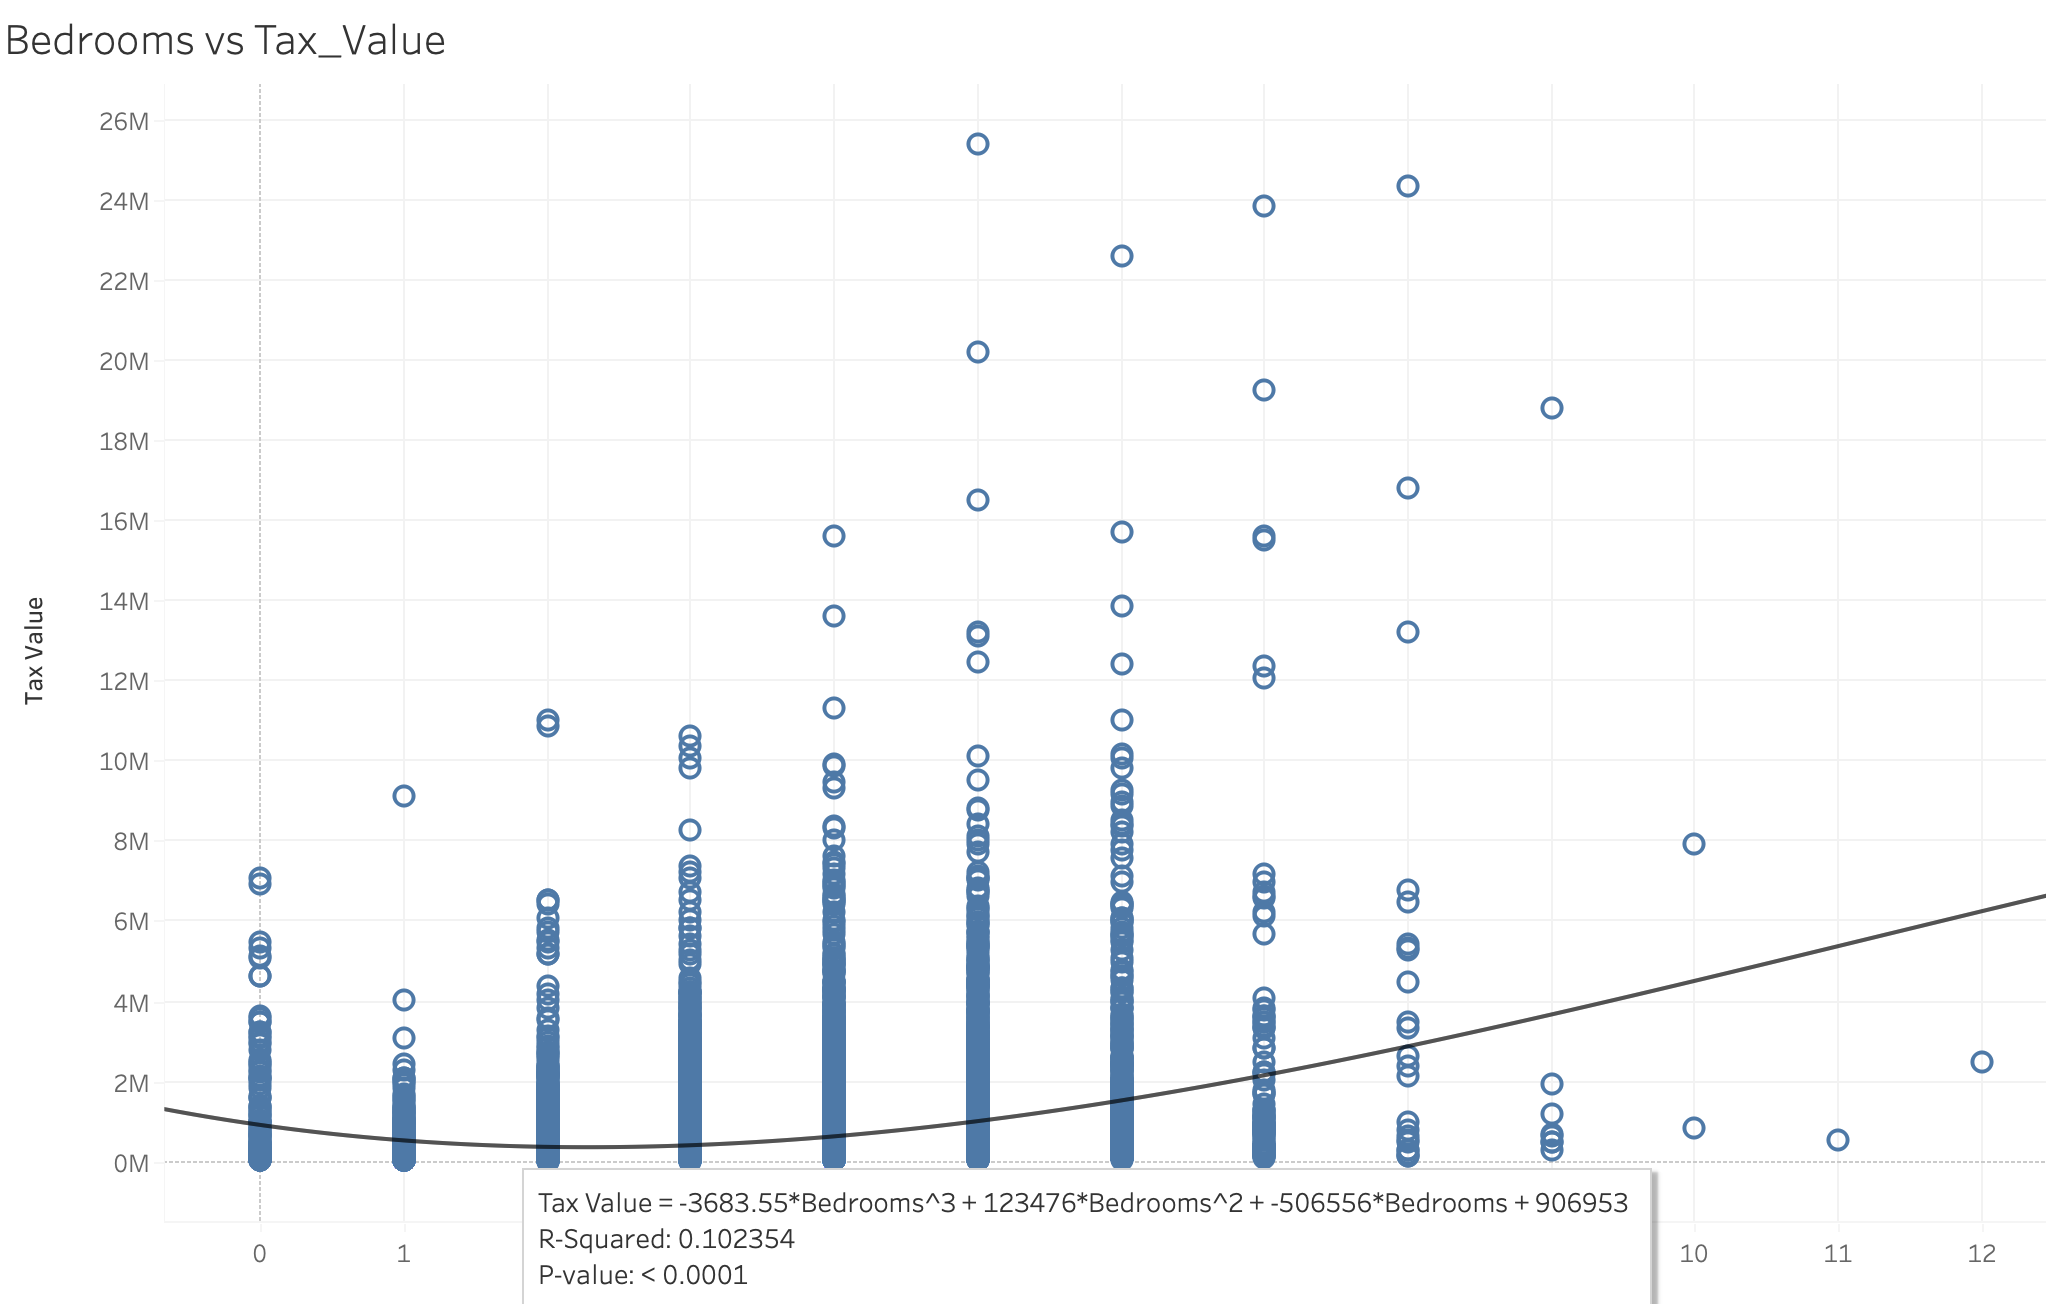

It appears bedrooms and tax value have a polnomial relationship. Trend line is polynomial with r value of 0.1 which indicates a weak positive correlation

## Can the number of bathrooms a property have help us know a property's appraisal value?

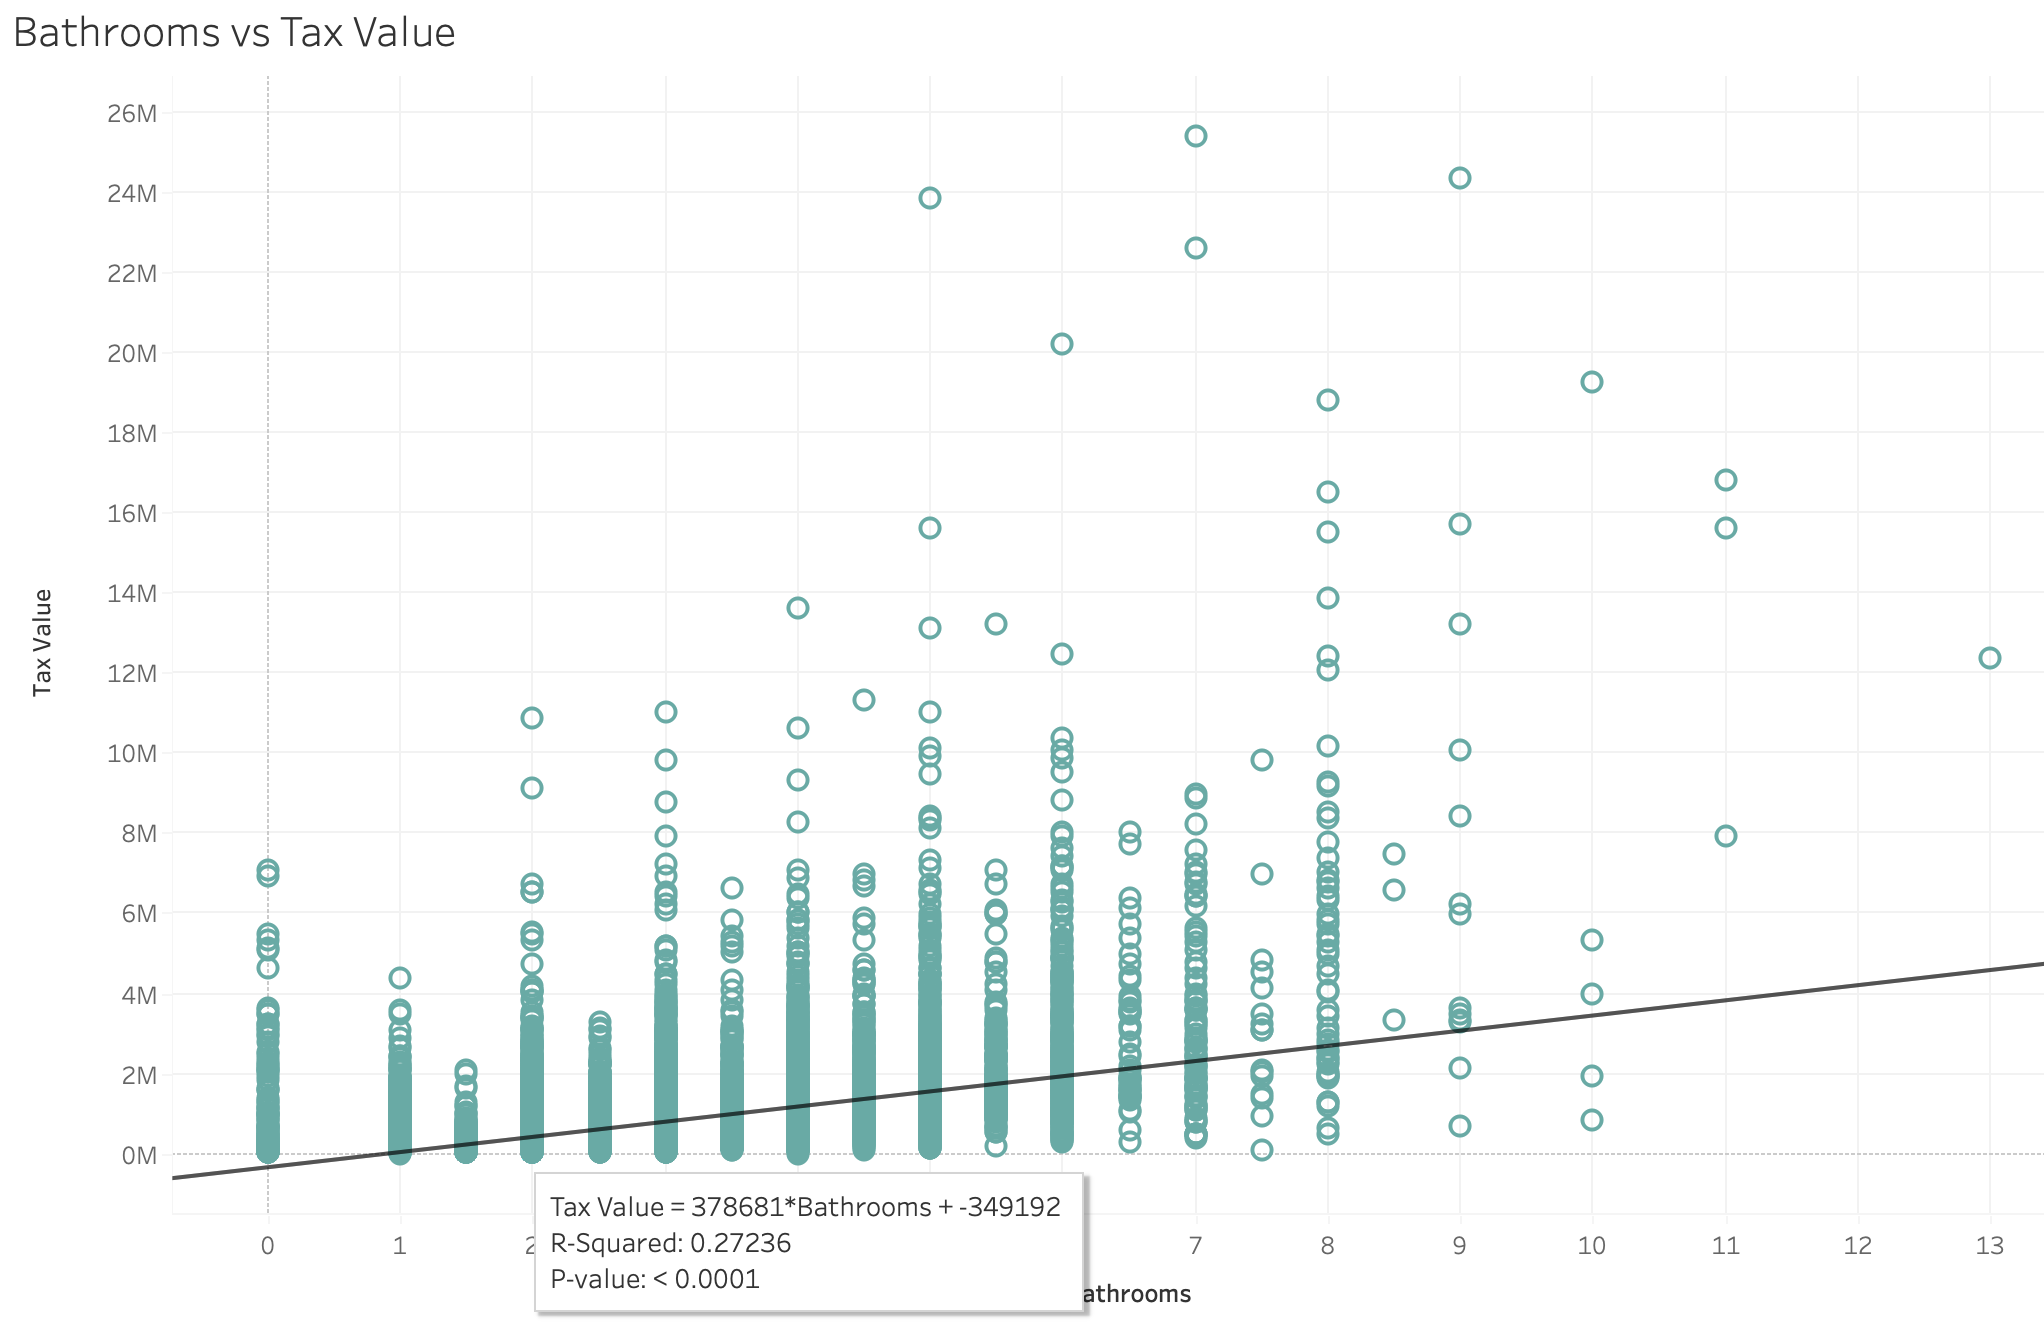

Number of bathrooms vs tax value appears to have a positive correlation with r value of 0.27. R value indicates weak positive correlation. It appears number of bathrooms would be a better predictor of tax value than bedrooms.

## Does the area of a property help us predict tax_value?

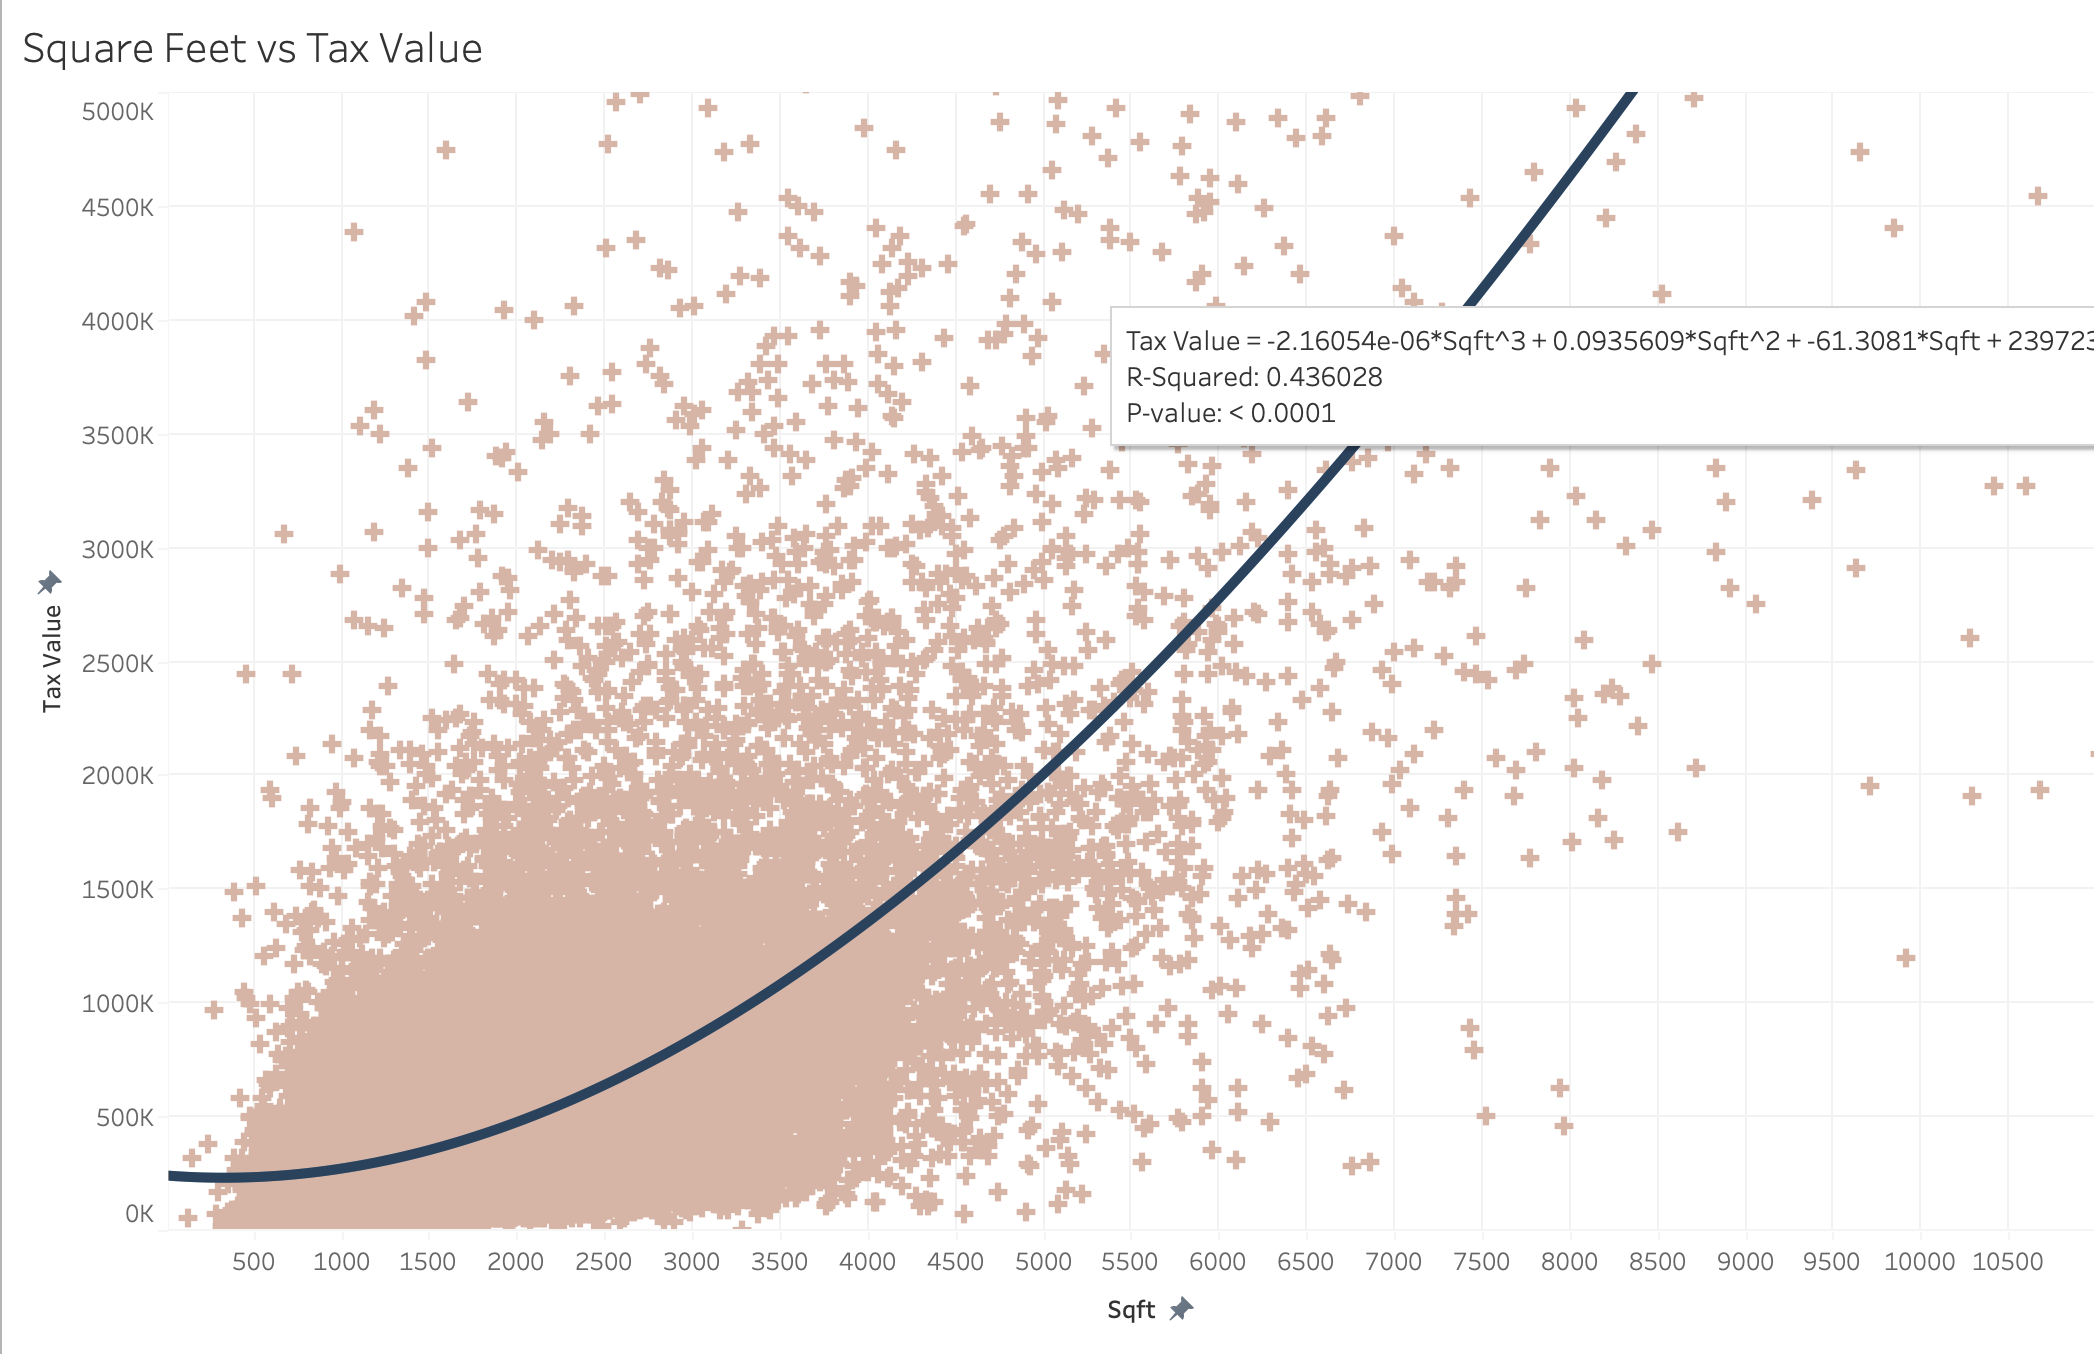

Square feet vs Tax value has a polynomial relationship. R value of 0.43 which indicates area/square feet is the best predictor of the 3 features explored.

* confidence interval of 95%
* and alpha value of 0.05

### Ho: there is not a correlation between square feet and tax value
### Ha: there is a correlation between square feet and tax value

The r value of 0.43 and p value of less that .05 indicates a moderate positive correlation between property area and tax value. Judging by other attributes analyzed these two variables appear to be the best ones to use when making our model.

# Exploration Summary

* Majority of houses appraised between 50 thousand and 500 thousand
* number of bedrooms and tax value have a very weak positive linear correlation
* number of bathrooms and tax value have a positive correlation
* Property area and tax value have the strongest relationship in data
    * r value indicates moderate positive polynomial correlation

# Features I'm modeling with

* tax value (target)
* number of bedrooms
* number of bathrooms
* total area of property

# Modeling

* I will use accuracy as my evaluation metric
* Average home value is 396,000.98

Modeling
I will use root mean square deviation as my evaluation metric

* by guessing no for every game one could achieve an accuracy of 73.5% 
* 529,683 will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

Scaling data

In [4]:
train = acquire.scale(train) #function that scales data

In [5]:
models = acquire.ols(train) # function that generates table of actual and predicted values for each model
models

,actual,lm_preds,lasso_preds,poly_preds,baseline
3030,1014822.0,255668.326375,255689.232102,263762.556648,396000.975952
47117,524894.0,519005.131867,519001.622856,529229.074811,396000.975952
7981,413692.0,255202.310806,255212.814253,234351.133878,396000.975952
2392,272033.0,435658.257385,435626.897159,439049.703738,396000.975952
2925,554009.0,409834.042056,409841.695971,406349.537293,396000.975952
...,...,...,...,...,...
34526,338167.0,403146.111729,403141.487676,410527.123235,396000.975952
5859,340520.0,229760.293605,229783.848471,234300.560510,396000.975952
3928,797361.0,432133.546717,432144.145436,438665.005318,396000.975952
44866,283501.0,243511.450013,243510.187050,245349.269796,396000.975952


In [6]:
acquire.calc_rmse(models) #function calculates root mean square deviation

,lm_rmse,lasso_rmse,poly_rmse,base_rmse
0,230194.677632,230194.67855,229888.467075,270943.834067


In [ ]:
pd.DataFrame({'linear': [lm_rmse], 
              'lars': [lasso_rmse], 
              'poly_rmse': [poly_rmse],
             'lassopoly' :[lassopoly_rmse],
             'baseline': [base_rmse]})

# Comparing models

* Decision tree, random forest, Logistic Regression, and KNN all had similiar accuracy with KNN being slightly more accurate
* KNN model is overfit
* Decision tree, random forest, and logistic regression had the most similar results
* all models slightly did better than baseline
* I will be using the logistic regression model on my test data set

In [ ]:
y_pred = logit.predict(x_test)
print(classification_report(y_test, y_pred))

# Modeling Summary

* all models did slightly better than the baseline
* KNN model is overfit
* Decision Tree and random forest are pretty good models but logistic regression is slightly better
* Logistic Regression was used on the test data

In [ ]:
train

In [ ]:
med = np.median(train['tax_value'])
Q1 = np.percentile(train['tax_value'], 25, interpolation = 'midpoint')
Q3 = np.percentile(train['tax_value'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1


for i in train['tax_value']:
    if i >= Q3 + 1.5 * IQR:
        train['tax_value'] = train['tax_value'].replace(i, med )
        
    elif i <= Q1 - 1.5 * IQR:
        train['tax_value'] = train['tax_value'].replace(i, med )

In [ ]:
med

In [ ]:
l = pd.DataFrame()

In [ ]:
l

# Conclusions

### Explore

* "Internet service type" and "online security" were each found to be factors of "churn"
    * The influence appears strong
* Monthly charges appears to have influence on churn
    * the spread of the distribution indicates that the influence is weak
* Contract type can may influence churn based on visuals
* Having online security also affects churn as shown in our visuals
* These are enough features to create a model that can predict customer churn

### Modeling

* None of the models signifigantly out performed the baseline 
* All models had similar accuracy
* Possible Reasons:
    * hyperparameters were not good predictors of churn


### Reccomendations

* Consider lowering price of Fiber Optic and increase customers with online_security
* Use Logistic Regression model to predict whether or not a customer is going to churn and have marketing team target these customers

### What's next

* Select different hyperparameters and run models again to get a better one
* ask supervisor to purchase tableau so I can make better visuals